# Automated Feature Selection on Cancer data set

## Commom Methods:
    - Univariate statistics
    - Model based selection
    - itereative selection
    

## Univariate Statistics:
    - SelectKBest
    - SelectPercentile

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline
cancer = load_breast_cancer()



In [5]:
cancer.data.shape

(569, 30)

In [6]:
# to check the percentile we add the noise data into the orignal data set
randomSeed = np.random.RandomState(42)
noise_data = randomSeed.normal(size=(len(cancer.data), 50))
#Now add the new noise_data to the orignal data 
new_data = np.hstack([cancer.data,noise_data])

In [7]:
new_data.shape

(569, 80)

In [8]:
# Splitting the data
X_train, X_test,y_train,y_test = train_test_split(new_data,cancer.target,random_state=0, test_size=.5)

In [9]:
print("X_train size:{}".format(X_train.shape))
print("X_test size:{}".format(X_test.shape))
print("y_train size:{}".format(X_train.shape))
print("y_test size:{}".format(X_test.shape))

X_train size:(284, 80)
X_test size:(285, 80)
y_train size:(284, 80)
y_test size:(285, 80)


In [10]:
selectPercentile =  SelectPercentile(percentile=50)

In [11]:
selectPercentile

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x0000025880CDFBF8>)

In [12]:
selectPercentile.fit(X_train,y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x0000025880CDFBF8>)

In [13]:
selected_features = selectPercentile.transform(X_train)

In [14]:
print("X_train Shape: {}".format(X_train.shape))
print("New Selected Features Shape: {}".format(selected_features.shape))

X_train Shape: (284, 80)
New Selected Features Shape: (284, 40)


In [15]:
# Now we will see which features are selected by calling the gte_support function
# This return the boolien array with True indictes this feature is selected and false not
sel_feature_list = selectPercentile.get_support()
sel_feature_list.shape


(80,)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


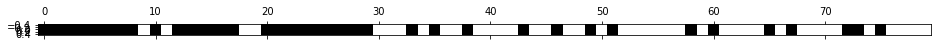

In [16]:
print (sel_feature_list)

# We also plot the list to see which feature are selected
# Black shows selected, white not
plt.matshow(sel_feature_list.reshape(1,-1), cmap='gray_r')

In [17]:
a = sel_feature_list.reshape(1,-1)
a.shape

(1, 80)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
regression = LogisticRegression()
regression.fit(X_train, y_train)

print("Score of Regression wit noise feature: {0:.3%}". format(regression.score(X_test, y_test)))



Score of Regression wit noise feature: 92.982%


In [20]:

X_test_seleced = selectPercentile.transform(X_test)
regression.fit(selected_features, y_train)
print("Score of Regression wit noise feature: {0:.3%}". format(regression.score(X_test_seleced, y_test)))

Score of Regression wit noise feature: 94.035%


# Model Based Selection
### Random Forest
### Decision Trees

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [23]:
randomForest = SelectFromModel(RandomForestClassifier(n_estimators=128,random_state=42), threshold='median')

In [25]:
randomForest.fit(X_train,y_train)
X_train_selected = randomForest.transform(X_train)

print ("Shape of the X_train :{}". format(X_train.shape))
print ("Shape of the X_train_selected :{}". format(X_train_selected.shape))

Shape of the X_train :(284, 80)
Shape of the X_train_selected :(284, 40)


In [28]:
randomForest.fit(X_test,y_test)
X_test_selected = randomForest.transform(X_test)

print ("Shape of the X_train :{}". format(X_test.shape))
print ("Shape of the X_train_selected :{}".format(X_test_selected.shape))

Shape of the X_train :(285, 80)
Shape of the X_train_selected :(285, 40)


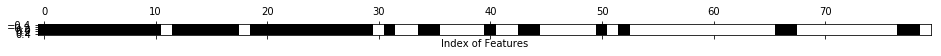

In [29]:
Ran_selected_features = randomForest.get_support()
plt.matshow(Ran_selected_features.reshape(1,-1),cmap='gray_r')
plt.xlabel("Index of Features")